<center><H1>KMeans Clustering</H1></center>

<p align="center">
  <img width="400" height="350" src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif">
</p>


### Steps

**All the libraries you need have been imported for you**

**Work through at least 2 of preloaded datasets and:**
- [Standardize your Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- Create Elbow Plot to Determine Clusters
- Apply [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- Plot Results of Actual Results Compared to KMeans Cluster Labels
- Determine Accuracy Score if true labels are known

### 🧞‍♂️BONUS🧞‍♀️
- Complete all 3 preloaded datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Dog Horse KMeans Challenge

In [2]:
# Import Data
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")
df_dh.sample(3)

,height,weight,target,type
146,72.0,143.0,1.0,horse
25,35.0,78.0,0.0,dog
199,58.0,98.0,1.0,horse


In [3]:
# drop target column 
df_dh.drop(df_dh.filter(regex="target"),axis=1, inplace=True)
df_dh.head()

,height,weight,type
0,27.0,71.0,dog
1,27.0,92.0,dog
2,32.0,47.0,dog
3,30.0,90.0,dog
4,28.0,91.0,dog


In [4]:
df_dh["type"] = df_dh["type"].replace('dog',1) 
df_dh["type"] = df_dh["type"].replace('horse',0)

In [5]:
df_dh.head()

,height,weight,type
0,27.0,71.0,1
1,27.0,92.0,1
2,32.0,47.0,1
3,30.0,90.0,1
4,28.0,91.0,1


In [6]:
df_dh.describe()

,height,weight,type
count,200.000000,200.000000,200.000000
mean,47.480000,106.830000,0.500000
std,18.415353,38.636836,0.501255
min,25.000000,40.000000,0.000000
25%,32.000000,80.000000,0.000000
50%,43.000000,99.000000,0.500000
75%,62.250000,141.000000,1.000000
max,84.000000,179.000000,1.000000


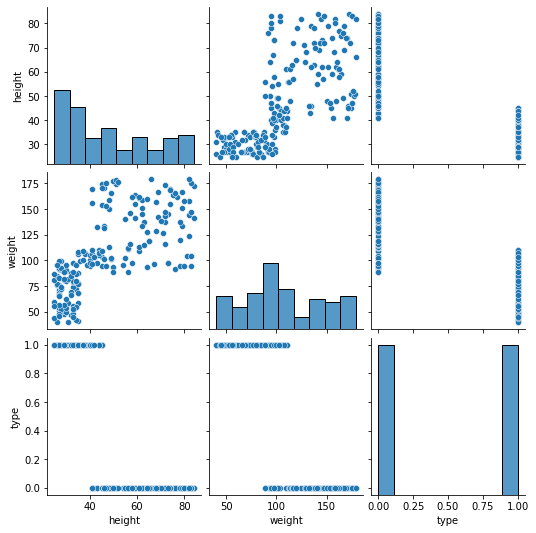

In [7]:
# Ploting all our features
sns.pairplot(df_dh)

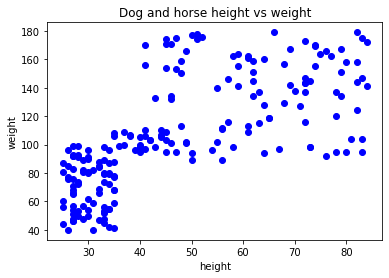

In [8]:
#Visualise data points

plt.scatter(df_dh['height'],df_dh['weight'],c='blue')
plt.title('Dog and horse height vs weight')
plt.xlabel('height')
plt.ylabel('weight')

plt.show()

### Scale Data

In [9]:
X = df_dh[['height', 'weight']]

sc = StandardScaler()
X_rescale= sc.fit_transform(X)

### Elbow Plot 

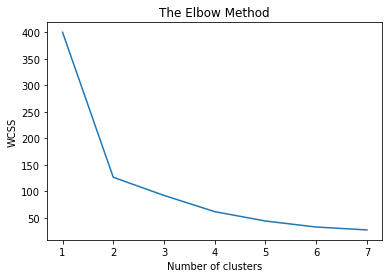

In [10]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X_rescale)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the plot we can see that the optimal number of clusters in 5 
# Note: This is also based on your judgment and your understanding of the dataset 

### Kmean

In [11]:
# Apply KMeans and Plot KMeans Results and Actual Results

kmeans_dh = KMeans(n_clusters = 2, init = 'k-means++', random_state = 14)
#kmeans_dh.fit(X_rescale,df_dh["type"])

y_kmeans = kmeans_dh.fit_predict(X_rescale)


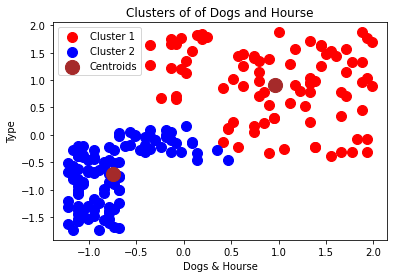

In [12]:
plt.scatter(X_rescale[y_kmeans == 0, 0], X_rescale[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X_rescale[y_kmeans == 1, 0], X_rescale[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')


plt.scatter(kmeans_dh.cluster_centers_[:, 0], kmeans_dh.cluster_centers_[:, 1], s = 200, c = 'brown', label = 'Centroids')

plt.title('Clusters of of Dogs and Hourse')
plt.xlabel('Dogs & Hourse')
plt.ylabel('Type')
plt.legend()
plt.show()

### Accuracy Score

In [13]:
# Compute Accuracy Score of KMean Labels with True Labels
ACC = accuracy_score(df_dh["type"], y_kmeans)
print(ACC)

0.935


## Seattle Weather KMeans Challenge

In [14]:
df_sea = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv")
df_sea.sample(3)

,ds,prcp,tmax,tmin,rain
8263,1970-08-16,0.00,69,52,False
20031,2002-11-04,0.00,51,30,False
23714,2012-12-04,0.56,53,45,True


In [15]:
# drop ds column 
df_sea.drop(df_sea.filter(regex="ds"),axis=1, inplace=True)
df_sea.head()

,prcp,tmax,tmin,rain
0,0.47,51,42,True
1,0.59,45,36,True
2,0.42,45,35,True
3,0.31,45,34,True
4,0.17,45,32,True


In [16]:
df_sea["rain"].value_counts()

False    14648
True     10900
Name: rain, dtype: int64

In [17]:
df_sea["rain"] = df_sea["rain"].replace(True,1) 
df_sea["rain"] = df_sea["rain"].replace(False,0) 

In [18]:
df_sea["rain"].value_counts()

0.0    14648
1.0    10900
Name: rain, dtype: int64

In [19]:
df_sea.isnull().sum()

prcp    3
tmax    0
tmin    0
rain    3
dtype: int64

In [21]:
#drop nan values
#Since the percentage of null values less than 10%, i will drooped them 
df_sea= df_sea.dropna()

In [22]:
df_sea.isnull().sum()

prcp    0
tmax    0
tmin    0
rain    0
dtype: int64

In [23]:
df_sea.describe()

,prcp,tmax,tmin,rain
count,25548.000000,25548.000000,25548.000000,25548.000000
mean,0.106222,59.543056,44.513387,0.426648
std,0.239031,12.773265,8.893019,0.494600
min,0.000000,4.000000,0.000000,0.000000
25%,0.000000,50.000000,38.000000,0.000000
50%,0.000000,58.000000,45.000000,0.000000
75%,0.100000,69.000000,52.000000,1.000000
max,5.020000,103.000000,71.000000,1.000000


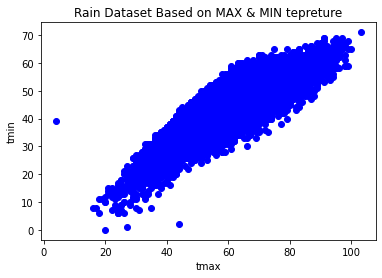

In [24]:
#Visualise data points

plt.scatter(df_sea['tmax'],df_sea['tmin'],c='blue')
plt.title('Rain Dataset Based on MAX & MIN tepreture')
plt.xlabel('tmax')
plt.ylabel('tmin')

plt.show()

### Scale Data

In [25]:
# Scale Data
X_rain = df_sea[['tmax', 'tmin','prcp']]
sc = StandardScaler()
X_rescale_rain= sc.fit_transform(X_rain)

### Elbow Plot 

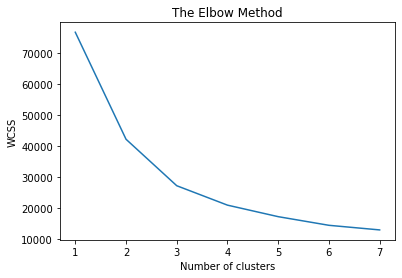

In [26]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X_rescale_rain)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the plot we can see that the optimal number of clusters in 5 
# Note: This is also based on your judgment and your understanding of the dataset 

### Kmean

In [27]:
# Apply KMeans and Plot KMeans Results and Actual Results

kmeans_sea = KMeans(n_clusters = 2, init = 'k-means++', random_state = 14)
#kmeans_dh.fit(X_rescale,df_dh["type"])

y_kmeans = kmeans_sea.fit_predict(X_rescale_rain)


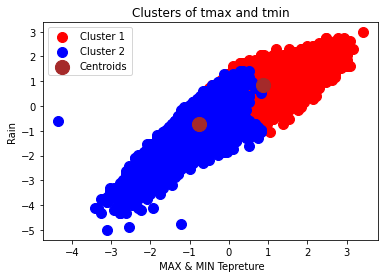

In [28]:
plt.scatter(X_rescale_rain[y_kmeans == 0, 0], X_rescale_rain[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X_rescale_rain[y_kmeans == 1, 0], X_rescale_rain[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')


plt.scatter(kmeans_sea.cluster_centers_[:, 0], kmeans_sea.cluster_centers_[:, 1], s = 200, c = 'brown', label = 'Centroids')

plt.title('Clusters of tmax and tmin')
plt.xlabel(' MAX & MIN Tepreture')
plt.ylabel('Rain')
plt.legend()
plt.show()

### Accuracy Score

In [29]:
# Compute Accuracy Score of KMean Labels with True Labels
ACC = accuracy_score(df_sea["rain"], y_kmeans)
print(ACC)

0.6631438860184751


#### Random Blob KMeans Challenge

- You dont have true labels for this data so this is truly an unsupervised dataset
- The blobs are randomly generated every time you run the cell and their characteristics are:
    - 2000-4000 data points
    - 10-30 blobs created

In [ ]:
df_blob = pd.DataFrame(make_blobs(random.randint(2000,4000), centers=random.randint(10,30))[0])
df_blob.plot(kind="scatter", x=0, y=1, title="Blobs", figsize=(12,10));

In [ ]:
# Scale Data

In [ ]:
# Create Elbow Plot

In [ ]:
# Apply KMeans and Plot KMeans Results